In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
from sklearn.neighbors import LocalOutlierFactor
import torch
from sklearn import preprocessing

In [3]:
def train(x_train,y_train,spocher):
        index_spoches = np.zeros(len(x_train)-len(x_train)%spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        index_spoches = index_spoches.reshape(spoches,int((len(x_train)-(len(x_train)%spoches))/spoches)).astype(int)
        return index_spoches

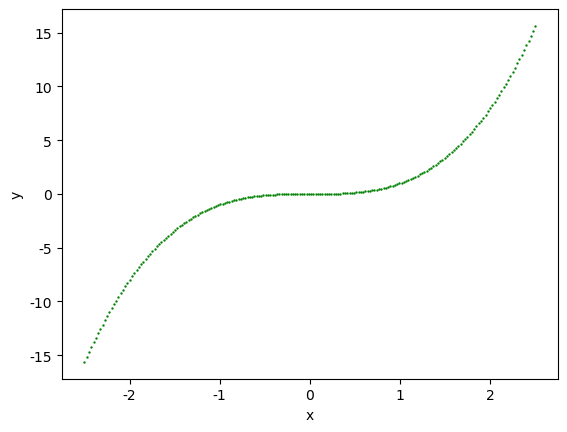

In [31]:
n = 200
x = np.linspace(2.5,-2.5,n)
y = x**3
plt.figure()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x,y,color="green",s=0.5)
# plt.title("真实映射关系")#设置figure名称
plt.show()

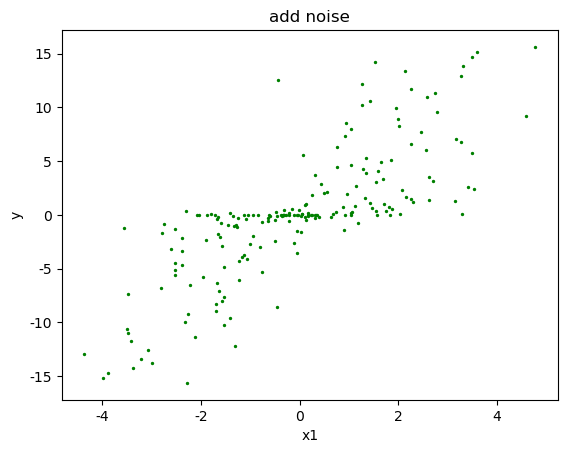

MSE:1.0461543993376643


In [32]:
x1 = x+np.random.normal(0,1,n)
plt.figure()
plt.xlabel("x1")
plt.ylabel("y")
plt.scatter(x1,y,color="green",s=2)
plt.title("add noise")#设置figure名称
plt.show()
print(f"MSE:{np.sum((x1-x)**2)/n}")

In [21]:
#lof 去除异常点
# threshold = 2
lof_model = LocalOutlierFactor(n_neighbors=30,p=2)
x11 = x1.reshape(x1.shape[0],1)
y11 = y.reshape(y.shape[0],1)
new_set = np.hstack((x11,y11))
lof_model.fit_predict(new_set)
score = lof_model.negative_outlier_factor_
# score = lof_model._predict()
m = int(len(x1)*0.9)
score_index = np.argsort(abs(score))[0:m]
x1 = x1[score_index]
y = y[score_index]
# x1 = x1[np.where(abs(score)<threshold)]
# y = y[np.where(abs(score)<threshold)]
x1.shape

(180,)

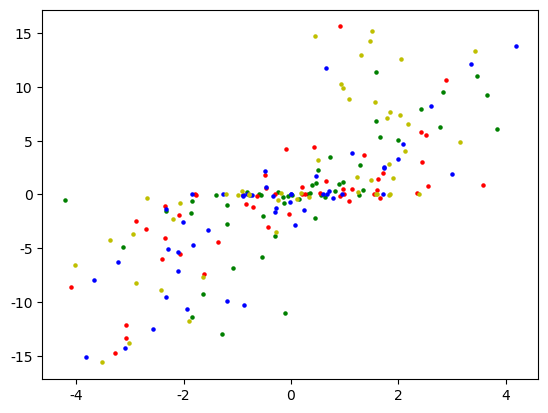

In [12]:
spoches = 4
index = train(x1,y,spoches)
plt.figure()

a = ["green","red","b","y"]
for i in range(4):
    index1 = np.argsort(x1[index[i]])
    plt.scatter(x1[index[i][index1]],y[index[i][index1]],color=a[i],s=5)
#     plt.title("加入噪音后映射关系")#设置figure名称
plt.show()

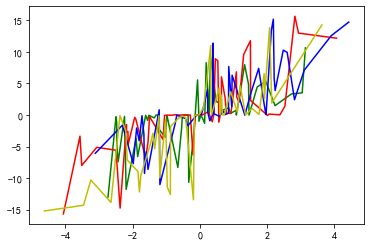

In [44]:
#根据x大小连接
for i in range(4):
    index1 = np.argsort(x1[index[i]])
    plt.plot(x1[index[i][index1]],y[index[i][index1]],color=a[i])
#     plt.title("加入噪音后映射关系")#设置figure名称
plt.show()

In [33]:
#根据x距离填充样本点
x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
import math
a,i = 0,0
for i in range(x1.shape[0]):
    a += round((round(y[i]**(1/3),3)-x1[i])**2,3)
    i += 1
    if i ==98:
        break
    # print(a)
print(x1.shape[0],a/99)

3323 1.1953535353535358


In [7]:
#根据x和y距离填充样本点
x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        x_y_set = np.vstack((x_set,y_set)).T
#         cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        cha = 10*(np.linalg.norm(x_y_set[i]-x_y_set[i+1],ord=2,axis=0))
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
x1.shape

(13524,)

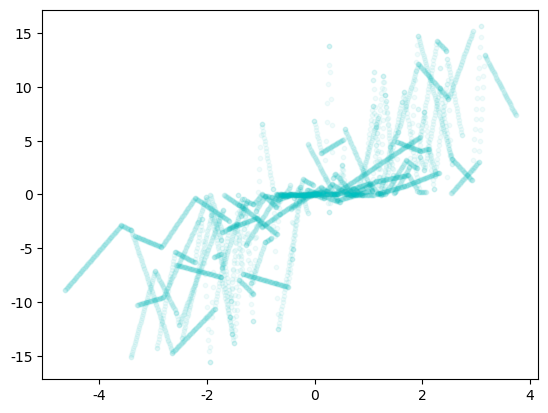

(4732,)

In [141]:
plt.figure()
plt.scatter(x1,y,color="c",s=10,alpha=0.05)
plt.show()
x1.shape

In [140]:
def cbrt(a):#python 不可以给负数开根，用此函数可以
    b = np.zeros(a.shape)
    for i in range(len(a)):
        s = -1 if a[i] < 0 else 1
        b[i]=s * (a[i]*s) ** (1/3)
    return b
n = 200
x = np.linspace(2.5,-2.5,n)
y = x**3
x1 = x+np.random.normal(0,1,n)
spoches =8
index = train(x1,y,spoches)
#根据x距离填充样本点
x_point=[]
y_point=[]
for k in range(spoches):
    x_set = x1[index[k]]
    y_set = y[index[k]]
    sort_index = np.argsort(x_set)
    for i in range(len(x_set)):
        if i == len(x_set)-1:
            continue
        cha = 100*(x_set[sort_index[i+1]]-x_set[sort_index[i]])
        x_point.append(np.linspace(x_set[sort_index[i]],x_set[sort_index[i+1]],int(cha)))
        y_point.append(np.linspace(y_set[sort_index[i]],y_set[sort_index[i+1]],int(cha)))
for i in x_point:
    x1 = np.hstack((x1,i))
for i in y_point:
    y = np.hstack((y,i))
import math
a,i = 0,0
for i in range(x1.shape[0]):
    a += round((round(y[i]**(1/3),3)-x1[i])**2,3)
    i += 1
    if i ==98:
        break
np.sum((cbrt(y)-x1)**2)/x1.shape

array([0.68086872])

In [142]:
#距离度量加上y
class dyk:
    
    def __init__(self,spoches=4,distance=2,number_parameter=2):
        self.spoches = spoches
        self.distance = distance
        self.number_parameter = number_parameter
        
    def _distance(self,x1,x2):
        if x1.ndim >1 or x2.ndim>1:
            return np.linalg.norm(x1-x2,ord = self.distance,axis=1)
        else:
            return np.linalg.norm(x1-x2,ord = self.distance)
        
    def train(self,x_train,y_train):#dividing k sets
        index_spoches = np.zeros(len(x_train)-len(x_train)%self.spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%self.spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        self.index_spoches = index_spoches.reshape(self.spoches,
                                                   int((len(x_train)-(len(x_train)%self.spoches))/self.spoches)).astype(int)
        self.x_train = x_train
        self.y_train = y_train
        
    def d_fitting(self):#K-routes filling
        x_point = []
        y_point = []
        for k in range(self.spoches):
            xk_set = self.x_train[self.index_spoches[k]]
            yk_set = self.y_train[self.index_spoches[k]]
            distance = np.linalg.norm(xk_set,ord=self.distance,axis=1)
            #与零点的距离作为排序，确保连线的起点从最接近零点开始
            xk_set = xk_set[np.argsort(distance)]
            yk_set = yk_set[np.argsort(distance)]
            remaining_xset = xk_set
            remaining_yset = yk_set
            for i in range(len(xk_set)):
                if i == len(xk_set)-1:
                    continue
                elif i == 0:
                    point_x = xk_set[i]
                    point_y = yk_set[i]
                    remaining_xset = remaining_xset[1:]
                    remaining_yset = remaining_yset[1:]
                point_x_y = np.hstack((point_x,point_y))
                remaining_x_y = np.hstack((remaining_xset,remaining_yset.reshape(remaining_yset.shape[0],1)))
                distance = self._distance(point_x_y,remaining_x_y)
                min_index = np.argmin(distance)
                x_point.append((np.linspace(point_x,remaining_xset[min_index],int(self.number_parameter*distance[min_index]))))
                y_point.append((np.linspace(point_y,remaining_yset[min_index],int(self.number_parameter*distance[min_index]))))
                point_x = remaining_xset[min_index]
                point_y = remaining_yset[min_index]
                remaining_xset = np.delete(remaining_xset,min_index,axis=0)
                remaining_yset = np.delete(remaining_yset,min_index,axis=0)
        for i in x_point:
            self.x_train = np.vstack((self.x_train,i))
        for i in y_point:
            self.y_train = np.hstack((self.y_train,i))
        
        return self.x_train,self.y_train
    
    def y_adjustment(self,neighbors = 50,threshold = 3.5):#yawing correcting
        a = self.y_train
        lof_model = LocalOutlierFactor(n_neighbors=neighbors,p=self.distance)
        lof_model.fit_predict(np.hstack((self.x_train,a.reshape(len(self.x_train),1))))
        score = lof_model.negative_outlier_factor_
        self.x_train = self.x_train[np.where(abs(score)<threshold)]
        self.y_train = self.y_train[np.where(abs(score)<threshold)]
        
        return self.x_train,self.y_train

In [91]:
#距离度量不算y
class dyk:
    
    def __init__(self,spoches=4,distance=2,number_parameter=2):
        self.spoches = spoches
        self.distance = distance
        self.number_parameter = number_parameter
        
    def _distance(self,x1,x2):
        if x1.ndim >1 or x2.ndim>1:
            return np.linalg.norm(x1-x2,ord = self.distance,axis=1)
        else:
            return np.linalg.norm(x1-x2,ord = self.distance)
        
    def train(self,x_train,y_train):#dividing k sets
        index_spoches = np.zeros(len(x_train)-len(x_train)%self.spoches)
        index_list = list(range(0,len(x_train)))
        for i in range(len(x_train)-len(x_train)%self.spoches):
            index = np.random.choice(index_list)
            index_spoches[i] = index
            index_list.remove(index)
        self.index_spoches = index_spoches.reshape(self.spoches,
                                                   int((len(x_train)-(len(x_train)%self.spoches))/self.spoches)).astype(int)
        self.x_train = x_train
        self.y_train = y_train
        
    def d_fitting(self):#K-routes filling
        x_point = []
        y_point = []
        for k in range(self.spoches):
            xk_set = self.x_train[self.index_spoches[k]]
            yk_set = self.y_train[self.index_spoches[k]]
            distance = np.linalg.norm(xk_set,ord=self.distance,axis=1)
            xk_set = xk_set[np.argsort(distance)]
            yk_set = yk_set[np.argsort(distance)]
            remaining_xset = xk_set
            remaining_yset = yk_set
            for i in range(len(xk_set)):
                if i == len(xk_set)-1:
                    continue
                elif i == 0:
                    point_x = xk_set[i]
                    point_y = yk_set[i]
                    remaining_xset = remaining_xset[1:]
                    remaining_yset = remaining_yset[1:]
                distance = self._distance(point_x,remaining_xset)
                min_index = np.argmin(distance)
                x_point.append((np.linspace(point_x,remaining_xset[min_index],int(self.number_parameter*distance[min_index]))))
                y_point.append((np.linspace(point_y,remaining_yset[min_index],int(self.number_parameter*distance[min_index]))))
                point_x = remaining_xset[min_index]
                point_y = remaining_yset[min_index]
                remaining_xset = np.delete(remaining_xset,min_index,axis=0)
                remaining_yset = np.delete(remaining_yset,min_index,axis=0)
        for i in x_point:
            self.x_train = np.vstack((self.x_train,i))
        for i in y_point:
            self.y_train = np.hstack((self.y_train,i))
        
        return self.x_train,self.y_train
    
    def y_adjustment(self,neighbors = 50,threshold = 3.5):#yawing correcting
        a = self.y_train
        lof_model = LocalOutlierFactor(n_neighbors=neighbors,p=self.distance)
        lof_model.fit_predict(np.hstack((self.x_train,a.reshape(len(self.x_train),1))))
        score = lof_model.negative_outlier_factor_
        self.x_train = self.x_train[np.where(abs(score)<threshold)]
        self.y_train = self.y_train[np.where(abs(score)<threshold)]
        
        return self.x_train,self.y_train
def data_one(data):
    if data.dim() > 1:
        for i in range(data.shape[1]):
            ma = torch.max(data[:,i])
            mi = torch.min(data[:,i])
            cha = ma-mi
            for k in range(data.shape[0]):
                data[k,i] = (data[k,i]-mi)/cha
    else:
        ma = torch.max(data)
        mi = torch.min(data)
        cha = ma-mi
        for k in range(data.shape[0]):
            data[k] = (data[k]-mi)/cha
    return data

In [90]:
train_data = pd.read_csv("train.csv")
X = train_data.iloc[:1000,1:11].values
y = train_data.iloc[:1000,11].values
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [144]:
train_data = pd.read_excel(r"/Users/dyk/Desktop/paper/多任务学习/硬参数/尧尧研创的副本/2014-2022年5月空气污染数据(均值填充).xlsx")
x = train_data.iloc[:,4:9].values
y = train_data.iloc[:,3].values.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x)
y = min_max_scaler.fit_transform(y)
y = y.reshape(len(y))
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [ ]:
x1 = np.random.normal(5,2,1000)
x2 = np.random.randn(1000)
y = x1**2+x2**3+x1*x2-x2+5*x1
X = np.vstack((x1,x2))
X = X.T
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [ ]:
# threshold = 1.4
lof_model = LocalOutlierFactor(n_neighbors=50,p=2)
lof_model.fit_predict(np.hstack((x_train,y_train.reshape(len(x_train),1))))
score = lof_model.negative_outlier_factor_
m = int(len(x_train)*0.9)
score_index = np.argsort(abs(score))[0:m]
x_train = x_train[score_index]
y_train = y_train[score_index]

In [ ]:
# threshold = 1.4
lof_model = LocalOutlierFactor(n_neighbors=30,p=2)
lof_model.fit_predict(np.hstack((a1,b1.reshape(len(a1),1))))
score = lof_model.negative_outlier_factor_
a1 = a1[np.where(abs(score)<threshold)]
b1 = b1[np.where(abs(score)<threshold)]

In [153]:
#定义模型，拟合数据
model = dyk(spoches=50,number_parameter=10)
model.train(x_train,y_train)
#dyk优化
a1,b1=model.d_fitting()
print(a1.shape)

(5282, 5)


In [154]:
#knn
from sklearn import neighbors
for k in range(1,120,5):
    modelKNN=neighbors.KNeighborsRegressor(n_neighbors=k,weights='distance')
    modelKNN.fit(a1,b1)
    # modelKNN.fit(x_train,y_train)
    y_pred = modelKNN.predict(x_test)
    print("k:",(k),",  MSE:",(mean_squared_error(y_pred,y_test)))

k: 1 ,  MSE: 0.0025032340493406193
k: 6 ,  MSE: 0.0017703980120927798
k: 11 ,  MSE: 0.001559416505197902
k: 16 ,  MSE: 0.0015241438278384908
k: 21 ,  MSE: 0.0015213879093635403
k: 26 ,  MSE: 0.0015018310637167644
k: 31 ,  MSE: 0.001525415289774467
k: 36 ,  MSE: 0.0015339724950437005
k: 41 ,  MSE: 0.0015505310503872067
k: 46 ,  MSE: 0.001581481548676253
k: 51 ,  MSE: 0.0016140947771151003
k: 56 ,  MSE: 0.0016343334274760107
k: 61 ,  MSE: 0.0016609830538044195
k: 66 ,  MSE: 0.0016873249368632194
k: 71 ,  MSE: 0.0017028935271199573
k: 76 ,  MSE: 0.001729079366251501
k: 81 ,  MSE: 0.001746403423486378
k: 86 ,  MSE: 0.001771368835519733
k: 91 ,  MSE: 0.0018031298013922309
k: 96 ,  MSE: 0.0018141628623359607
k: 101 ,  MSE: 0.001845492333187324
k: 106 ,  MSE: 0.0018631404017296679
k: 111 ,  MSE: 0.001881253494938155
k: 116 ,  MSE: 0.001895026461675755


In [149]:
#前馈神经网络
from sklearn.neural_network import MLPRegressor
model =MLPRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mes1 = mean_squared_error(y_pred,y_test)
model =MLPRegressor()
model.fit(a1,b1)
y_pred = model.predict(x_test)
mes2 = mean_squared_error(y_pred,y_test)
print("原数据集MSE:%f\n处理后数据集MSE:%f"%(mes1,mes2))

原数据集MSE:0.001350
处理后数据集MSE:0.001219


In [119]:
#梯度提升决策树
from sklearn.ensemble import GradientBoostingRegressor
for i in range(10,300,20):
    model2 = GradientBoostingRegressor(n_estimators=i)
    # model2.fit(a1,b1)
    model2.fit(x_train,y_train)
    y_pred = model2.predict(x_test)
    mean_squared_error(y_test,y_pred)
    print("loss:%f , n_estimators:%d"%(mean_squared_error(y_test,y_pred),i))

loss:0.002945 , n_estimators:10
loss:0.001455 , n_estimators:30
loss:0.001306 , n_estimators:50
loss:0.001261 , n_estimators:70
loss:0.001248 , n_estimators:90
loss:0.001240 , n_estimators:110
loss:0.001240 , n_estimators:130
loss:0.001233 , n_estimators:150
loss:0.001249 , n_estimators:170
loss:0.001245 , n_estimators:190
loss:0.001241 , n_estimators:210
loss:0.001246 , n_estimators:230
loss:0.001250 , n_estimators:250
loss:0.001248 , n_estimators:270
loss:0.001259 , n_estimators:290


In [121]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
for i in range(1,201,20):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)
    regressor.fit(a1, b1)
    # regressor.fit(x_train,y_train)
    y_pred = regressor.predict(x_test)
    print("loss:%f , n_estimators:%d"%(mean_squared_error(y_test,y_pred),i))

loss:0.002010 , n_estimators:1
loss:0.001258 , n_estimators:21
loss:0.001265 , n_estimators:41
loss:0.001250 , n_estimators:61
loss:0.001244 , n_estimators:81
loss:0.001246 , n_estimators:101
loss:0.001241 , n_estimators:121
loss:0.001243 , n_estimators:141
loss:0.001244 , n_estimators:161
loss:0.001246 , n_estimators:181


In [37]:
from sklearn.svm import SVR
model1 = SVR()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
mse1 = mean_squared_error(y_test,y_pred)
model1 = SVR()
model1.fit(a1,b1)
y_pred=model1.predict(x_test)
mse2 = mean_squared_error(y_test,y_pred)
print("原数据集MES:%f\n处理后数据集MSE:%f"%(mse1,mse2))

原数据集MES:0.003863
处理后数据集MSE:0.003671
